# Algotytm przecinania się odcinków na płaszczyźnie

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sortedcontainers import SortedSet
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [4]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

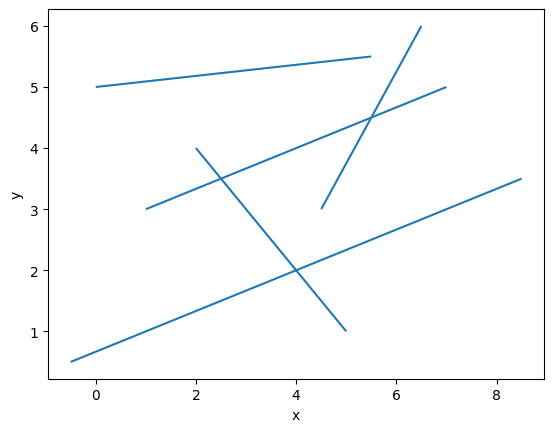

In [5]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

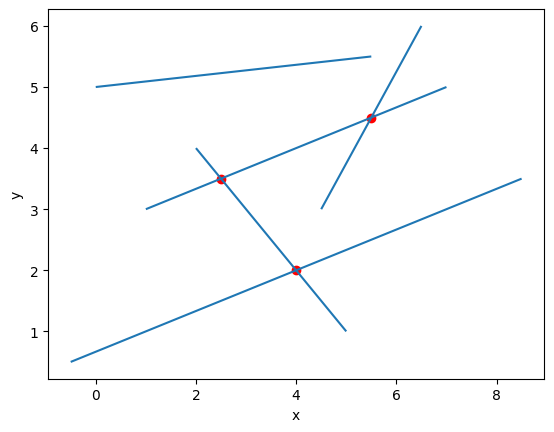

In [6]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [7]:
def generate_uniform_sections(max_x,max_y,n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: dla x - (0, max_x), dla y - (0, max_y).
    Pierwszy punkt reprezentujący odcinek to punkt "lewy" - o mniejszej współrzędnej x, drugi punkt to "prawy"
    :param max_x: określa maksymalną wartość współrzędnej x, jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzędnej y, jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica długości n odcinków w postaci krotek zawierających parę krotek 
    współrzędnych końców odcinków np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    used_x=set()
    sections=[]
    
    while len(sections)<n:
        x1=np.random.uniform(0,max_x)
        if x1 in used_x: 
            continue
        used_x.add(x1)
        y1=np.random.uniform(0,max_y)
        point1=(x1,y1)
        x2=np.random.uniform(0,max_x)
        if x2 in used_x: 
            continue
        used_x.add(x2)
        y2=np.random.uniform(0,max_y)
        point2=(x2,y2)
        if x1<x2:
            left,right=point1,point2
        else:
            left,right=point2,point1
        sections.append((left,right))
    return sections

In [8]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.109s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [9]:
generated_sections = generate_uniform_sections(1000,1000,20)

Zwizualizuj otrzymane odcinki

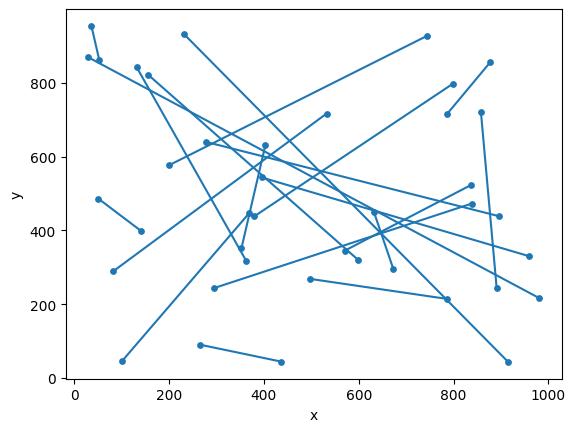

In [10]:
vis=Visualizer()
vis.add_line_segment(generated_sections)
vis.add_point([generated_sections[i//2][i%2] for i in range(2*len(generated_sections))],s=15)
vis.show()

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką

In [11]:
%matplotlib tk

interactive_sections=[]
used_x=set()
active=True
current_points=[]

def draw_point(point):
    """
    Funkcja rysuje punkt o współrzędnych przekazanych w argumencie.
    :param point: punkt reprezentowany przez krotkę współrzędnych x, y odczytanych z kliknięcia myszki
    """
    plt.scatter(point[0],point[1],color="red")
    plt.show()

def draw_line(points):
    """
    Funkcja rysuje odcinek między dwoma wskazanymi punktami.
    :param points: tablica punktów (krotek współrzędnych), które są końcami odcinka
    """
    ax=plt.gca()
    x=[points[0][0],points[1][0]]
    y=[points[0][1],points[1][1]]
    line=ax.plot(x,y,color="red") 
    ax.figure.canvas.draw()        

def onclick(event):
    """
    Funkcja obsługuje zdarzenie kliknięcia myszką, dodając końce odcinka
    w kliknięte miejsca lub kończąc wprowadzanie odcinków
    :param event: zdarzenie kliknięcia myszką, które przechowuje m. in. informacje 
    o klikniętym punkcie oraz to, który przycisk myszy został kliknięty
    """
    global active
    global current_points

    if event.dblclick and active:
        if event.button==1:
            x=event.xdata
            y=event.ydata
            if x in used_x:
                ax.set_title("Współrzędne x-owe punktów nie mogą się powtarzać!")
                plt.pause(1.5)
                ax.set_title("Kliknij dwukrotnie, aby dodać punkt.\nKażda kolejna para punktów stworzy odcinek")
            else:
                used_x.add(x)
                current_points.append((x,y))
                draw_point((x,y))
                if len(current_points)==2:
                    draw_line(current_points)
                    interactive_sections.append((current_points[0],current_points[1]))
                    current_points=[]
        elif event.button==3:
            if len(interactive_sections)<2:
                ax.set_title("Dodaj co najmniej dwa odcinki!")
                plt.pause(1.5)
                ax.set_title("Kliknij dwukrotnie, aby dodać punkt.\nKażda kolejna para punktów stworzy odcinek")
            else:
                active=False
                plt.pause(0.5)
                ax.set_title("Dziękuję! Zamykam w ciągu 2 sekund")
                plt.pause(2)
                plt.close()

fig,ax=plt.subplots()
plt.get_current_fig_manager().set_window_title("Wygeneruj własny zbiór odcinków!")
ax.set_title("Kliknij dwukrotnie, aby dodać punkt.\nKażda kolejna para punktów stworzy odcinek")
connection_id=fig.canvas.mpl_connect("button_press_event",onclick)
ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.aspect=1
plt.tight_layout()
plt.ion()
plt.show()

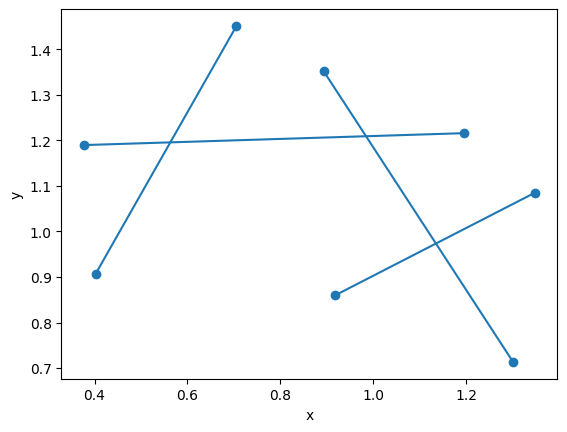

In [50]:
%matplotlib inline
vis=Visualizer()
vis.add_line_segment(interactive_sections)
vis.add_point([interactive_sections[i//2][i%2] for i in range(2*len(interactive_sections))])
vis.show()

Uzupełnij funkcję ```is_intersection```

In [58]:
class Point:
    def __init__(self,x,y):
        self.x=x #współrzędna x-owa
        self.y=y #współrzędna y-owa
        
    def __eq__(self,other): #przeciążenie operatora (==)
        return self.x==other.x and self.y==other.y
    
    def __gt__(self,other): #przeciążenie operatora (>)
        return self.x>other.x

    # This hash function lets us put Point class object to SortedSet
    def __hash__(self):
        return hash((self.x,self.y))
    
class Section:
    def __init__(self,L,R):
        self.L=L #lewy koniec odcinka
        self.R=R #prawy koniec odcinka
        self.a=(self.L.y-self.R.y)/(self.L.x-self.R.x) #współczynnik nachylenia
        self.b=self.L.y-self.a*self.L.x #wyraz wolny
        self.x=L.x
        
    def update_x(x): #metoda statyczna (pole wspólne dla klasy)
        Section.x=x

    # __eq__ and __gt__ are operators overloading to let us utilize SortedSet abilities easily
    def __eq__(self,other):
        return (self.L==other.L and self.R==other.R)

    # ktory odcinek w danym punkcie jest "nad" innym odcinkiem z ktorym jest porownywany
    def __gt__(self,other):
        return self.a*Section.x+self.b>other.a*Section.x+other.b

    # This hash function lets us put Section class object to SortedSet
    def __hash__(self):
        return hash((self.L,self.R))

In [1]:
def is_intersection(sections):
    """
    Funkcja sprawdza, czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek zawierających krotki współrzędnych końców odcinków
    :return: wartość typu Bool: True jeśli jakakolwiek para odcinków się przecina, False w przeciwnym razie
    """ 
    # korzystam z SortedSet z biblioteki SortedContainers
    T=SortedSet()
    Q=SortedSet()
    n=len(sections)
    # sprawdzam czy pary odcinków zostały już sprawdzone, w celu usunięcia duplikowania się wynikow
    checked_pairs=set()
    class_sections=[]

    # Dodaję wszystkie punkty należace do odcinków do struktury zdarzeń 
    for i in range(n):
        l=Point(sections[i][0][0],sections[i][0][1])
        r=Point(sections[i][1][0],sections[i][1][1])
        class_sections.append(Section(l,r))
        Q.add((l,'l',i))
        Q.add((r,'r',i))
        
    while len(Q)>0:
        # wyciagam punkt ze struktury zdarzen
        event=Q.pop(0)
        # aktualizuje aktualna pozycje x dla calej klasy globalnie
        Section.update_x(event[0].x)
        new_neighbours=[]
        # oddzielne przypadki kiedy rozpatrujemy lewy punkt odcinka, a inny kiedy prawy
        if event[1]=='l':
            # dodaje aktualny odcinek i indeks odcinka
            T.add((class_sections[event[2]],event[2]))
            index=T.index((class_sections[event[2]],event[2]))
            # sprawdzamy sasiada ktory jest na lewo
            if index>0:
                s_one=T[index-1][1]
                # sprawdzamy czy zmienili się sasiedzi, sprawdzajac aktulana pozycje w T
                index_one,index_two=min(s_one,event[2]),max(s_one,event[2])
                if not (index_one,index_two) in checked_pairs:
                    # dodajemy do checked pairs w celu usuniecia duplikatow
                    checked_pairs.add((index_one,index_two))
                    # dodajemy do listy nowych sasiadow
                    new_neighbours.append((index_one,index_two))
            # sprawdzamy sasiada ktory jest na prawo, tak samo jak w przypadku powyzej
            if index<len(T)-1:
                s_two=T[index+1][1]
                index_one,index_two=min(s_two,event[2]),max(s_two,event[2])
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
        else:
            index=T.index((class_sections[event[2]],event[2]))
            # rozpatrujemy tylko przypadek w ktorym koniec odcinka nie nalezy do odcinka kranocowego
            # wtedy nie ma sensu sprawdzac nowych sasiadow
            if index>0 and index<len(T)-1:
                # bierzemy obu sasiadow i patrzymy czy zmienili sie sasiedzi
                s_one=T[index-1][1]
                s_two=T[index+1][1]
                index_one,index_two=min(s_one,s_two),max(s_one,s_two)
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
            # usuwamy odcinek z struktury stanu
            del T[index]
        # jesli sa jacykolwiek nowi sasiedzi to sprawdzamy czy sie przecinaja
        for (s_one,s_two) in new_neighbours:
            if intersects(class_sections[s_one],class_sections[s_two]):
                return True
    return False

Poniżej funkcja `intersects` - funkcja pomocnicza do `is_intersection`. Będzie one także wykorzystywana w dalszej części programu, w funkcjach dopasowanych do innej wersji rozważanego problemu.

In [2]:
def intersects(section_one,section_two):
    """
    Funkcja sprawdza, czy podane odcinki się przecinają
    :param section_one: pierwszy sprawdzany odcinek
    :param section_two: drugi sprawdzany odcinek
    :return: współrzędne punktu przecięcia - jeżeli odcinki się przecinają, None w przeciwnym razie
    """

    # Funkcja wykorzystuje wzór podany na wykadzie sprawdzajacy czy dane odcinki sie przeicnaja
    # a - wspolczynnik wychylenia
    # b - wyraz wolny
    # L.x lewy koniec odcinka R.x prawy koniec odcinka
    (a_one,b_one)=section_one.a,section_one.b
    (a_two,b_two)=section_two.a,section_two.b
    (l_one,u_one)=section_one.L.x,section_one.R.x
    (l_two,u_two)=section_two.L.x,section_two.R.x

    # Jesli rownolegle
    if a_one==a_two:
        return None
    # wyliczamy punkt przecięcia x korzystajc z przekształconego rownania obu funkcji
    x=(b_two-b_one)/(a_one-a_two)

    # warunek sprawdza czy wyliczona wartość x znajduje się w zakresie obu odcinków
    if max(l_one,l_two)<x<min(u_one,u_two):
        # jesli tak to wyliczamy wartość y i zwracamy wynik ktorym jest punkt przeciecia sie odcinkow
        y=a_two*x+b_two
        return (x,y)
    return None

In [62]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.006s


W testowaniu funkcji będą używane zbiory odcinków przygotowane przez koło naukowe AGH Bit. Poniższe zbiory odcinków zostały wybrane przeze mnie. Będą one użyte przy wizualizacji działaniu algorytmów, także w drugim sformułowaniu problemu - znalezienie wszystkich przecięć odcinków w danym zbiorze odcinków.

In [82]:
sections_one=[((0.11160925733331661,0.29566077245230327),(1.7254225819790243,1.790774778966961)),
              ((0.11449622213590283,1.6818869241507675),(1.7600661596100593,0.1993369008841321)),
              ((0.489801646472114,1.7782107957189388),(0.5966193441678048,0.09463704048394597)),
              ((0.12893104614883405,0.5008724988366682),(1.6041700602704023,0.6265123313168915)),
              ((0.35700126555314693,0.21190088413215444),(0.8968636836367738,1.6651349464867378)),
              ((0.21842695502900744,1.4180432759422985),(1.5464307642186776,1.4180432759422985)),
              ((0.7496284787048755,1.6609469520707303),(1.396308594484193,0.9615518845974872))]

sections_two=[((0.4551580688410791,0.1909609120521172),(1.6070570250729885,1.8703466728711027)),
              ((0.23574874384452493,1.7363308515588642),(1.7023268635583344,1.4557352256863656)),
              ((0.8622201060057388,1.949918566775244),(1.2577342839600536,1.7698348068869239)),
              ((0.29926196950142214,1.2965914378780825),(1.731196511584197,0.660016286644951)),
              ((0.06541782049193678,0.8777919962773383),(0.5042364704850452,0.9866798510935318)),
              ((0.18667034220055884,0.6474523033969287),(1.1740123046850528,0.26634481154025125)),
              ((1.0556467477790168,0.6432643089809212),(1.503126292179884,0.5218124709167054))]

sections_three=[((0.25884446226521485,0.18677291763610973),(1.719648652373852,0.22027687296416928)),
                ((0.32235768792211206,1.4054792926942763),(0.5821845201548737,0.4296765937645416)),
                ((0.755402408310048,0.358480688692415),(1.7889358076359216,1.0620637505816657)),
                ((0.12893104614883405,0.7437761749651),(0.3483403711453883,0.7395881805490925)),
                ((0.20110516621349006,1.6525709632387156),(0.9084115428471187,1.928978594695207)),
                ((0.6428107810091847,1.459923220102373),(1.84378813888506,1.2212075383899486)),
                ((1.1826731990928114,1.4515472312703581),(1.5550916586264363,1.8368427175430428)), 
                ((0.5157843296953901,1.6441949744067006),(0.9141854724522911,1.6400069799906931)),
                ((1.3905346648790207,0.5678804094927873),(1.8206924204643704,0.37104467194043733))]

sections_four=[((0.07985264450486795,1.1667636109818518),(0.7958199155462553,0.6223243369008841)),
               ((0.1664615885824552,0.48830851558864585),(0.7525154435074617,0.8359120521172637)),
               ((0.19533123660831753,0.8065960912052116),(0.21842695502900744,0.8526640297812936)), 
               ((0.3079228639091809,0.7898441135411819),(0.40319270239452676,0.7647161470451372)),
               ((0.18378337739797257,1.3594113541181942),(1.6157179194807474,0.3626686831084225)),
               ((0.8824288596238425,0.32078873894834803),(1.8322402796747153,0.7479641693811074)),
               ((0.9488290500833261,0.517624476500698),(1.0354379941609133,0.4841205211726384)),
               ((1.127820867843673,0.5427524429967426),(1.1826731990928114,0.5720684039087948)), 
               ((0.5359930833134938,1.422231270358306),(1.6186048842833336,1.0201838064215913)),
               ((0.6745673938376333,1.0871917170777103),(1.7398574059919556,1.3971033038622613)),
               ((0.7294197250867718,1.1625756165658443),(0.7813850915333241,1.196079571893904)),
               ((0.8622201060057388,1.2128315495579338),(0.9517160148859123,1.2212075383899486))]

Sprawdźmy czy przygotowane zbiory zawieraj przynajmniej jedno przecięcie.

In [83]:
print(is_intersection(sections_one))
print(is_intersection(sections_two))
print(is_intersection(sections_three))
print(is_intersection(sections_four))

True
True
False
True


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

Wykorzystuję do tego mechanizm obiektowy w pythonie do zdefiniowania dwóch klas Section i Point, takie zapisanie tych struktur pomaga w łatwym odczytaniu własności danych obiektów jak i pozwala poprzez przeciazenie operatorów użyć tych obiektów w strukturze zdarzeń.
Jako strukturę zdarzeń użyłem SortedSet z biblioteki `sortedcontainers` struktura ta pozwala przechowywać posortowane elementy w zbiorze, i dodatkowo przechowuje indeksy dancyh elementów. W naszym algorytmie jest to bardzo sprawne ponieważ potrzebujemy sprawdzić czy w rozpatrywanym punkcie zmieniaja sie sasiedzi.

Uzupełnij funkcję ```is_intersection_with_visualization```

In [69]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza, czy jakakolwiek para podanych odcinków się przecina; dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek zawierających krotki współrzędnych końców odcinków
    :return: krotka postaci (wartość typu Bool: True jeśli jakakolwiek para odcinków się przecina, 
    False w przeciwnym razie; wizualizer przedstawiający kolejne kroki algorytmu)
    """
    T=SortedSet()
    Q=SortedSet()
    n=len(sections)
    checked_pairs=set()
    class_sections=[]
    vis=Visualizer()
    
    if n==0:
        return False,vis
    
    vis.add_line_segment(sections)
    vis.add_point([sections[i//2][i%2] for i in range(2*n)],color="blue")
    for i in range(n):
        l=Point(sections[i][0][0],sections[i][0][1])
        r=Point(sections[i][1][0],sections[i][1][1])
        class_sections.append(Section(l,r))
        Q.add((l,'l',i))
        Q.add((r,'r',i))
    min_y=min([sections[i//2][i%2][0] for i in range(2*n)])
    max_y=max([sections[i//2][i%2][0] for i in range(2*n)])
    while len(Q)>0:
        event=Q.pop(0)
        Section.update_x(event[0].x)
        broom=vis.add_line(((event[0].x,min_y),(event[0].x,max_y)),color="red")
        new_neighbours=[]
        if event[1]=='l':
            T.add((class_sections[event[2]],event[2]))
            vis.add_point((event[0].x,event[0].y),color="green",s=25)
            vis.add_line_segment(sections[event[2]],color="green")
            vis.add_point(sections[event[2]][1],color="green",s=25)
            index=T.index((class_sections[event[2]],event[2]))
            if index>0:
                s_one=T[index-1][1]
                index_one,index_two=min(s_one,event[2]),max(s_one,event[2])
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
            if index<len(T)-1:
                s_two=T[index+1][1]
                index_one,index_two=min(s_two,event[2]),max(s_two,event[2])
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
        else:
            index=T.index((class_sections[event[2]],event[2]))
            vis.add_point((event[0].x,event[0].y),color="brown",s=25)
            vis.add_line_segment(sections[event[2]],color="brown")
            vis.add_point(sections[event[2]][0],color="brown",s=25)
            if index>0 and index<len(T)-1:
                s_one=T[index-1][1]
                s_two=T[index+1][1]
                index_one,index_two=min(s_one,s_two),max(s_one,s_two)
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
            del T[index]
        for (s_one,s_two) in new_neighbours:
            point_one=vis.add_point(sections[s_one][0],color="yellow",s=25)
            point_two=vis.add_point(sections[s_one][1],color="yellow",s=25)
            section_one=vis.add_line_segment(sections[s_one],color="yellow")
            point_three=vis.add_point(sections[s_two][0],color="yellow",s=25)
            point_four=vis.add_point(sections[s_two][1],color="yellow",s=25)
            section_two=vis.add_line_segment(sections[s_two],color="yellow")
            point=intersects(class_sections[s_one],class_sections[s_two])
            if point is not None:
                vis.add_point(point,color="red",s=35)
                return True,vis
            vis.remove_figure(point_one)
            vis.remove_figure(point_two)
            vis.remove_figure(section_one)
            vis.remove_figure(point_three)
            vis.remove_figure(point_four)
            vis.remove_figure(section_two)
        vis.remove_figure(broom)
    return False,vis

Uzupełnij funkcję ```find_intersections```

In [70]:
def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek, w których pierwszym elementem 
    są współrzędne danego punktu przecięcia, a drugim i trzecim indeksy odcinków z listy wejściowej, 
    które się przecinają w tym punkcie, np. [((x1,y1),id1,id2),((x2,y2),id3,id4),...]
    Uwaga! W zwracanej tablicy indeksy zaczynają się od 1
    """   
    print(sections)
    T=SortedSet()
    Q=SortedSet()
    n=len(sections)
    checked_pairs=set()
    class_sections=[]
    intersections=[]

    # Dodaję wszystkie punkty należace do odcinków do struktury zdarzeń 
    for i in range(n):
        l=Point(sections[i][0][0],sections[i][0][1])
        r=Point(sections[i][1][0],sections[i][1][1])
        class_sections.append(Section(l,r))
        Q.add((l,'l',i))
        Q.add((r,'r',i))
    while len(Q)>0:
        event=Q.pop(0)
        new_neighbours=[]
        if event[1]=='l':
            # uzywam "globalnej" wartosci x w celu liczenia pozycji odcinkow wzgledem siebie 
            Section.update_x(event[0].x)
            T.add((class_sections[event[2]],event[2]))
            index=T.index((class_sections[event[2]],event[2]))
            if index>0:
                s_one=T[index-1][1]
                index_one,index_two=min(s_one,event[2]),max(s_one,event[2])
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
            if index<len(T)-1:
                s_two=T[index+1][1]
                index_one,index_two=min(s_two,event[2]),max(s_two,event[2])
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
        elif event[1]=='r':
            Section.update_x(event[0].x)
            index=T.index((class_sections[event[2]],event[2]))
            if index>0 and index<len(T)-1:
                s_one=T[index-1][1]
                s_two=T[index+1][1]
                index_one,index_two=min(s_one,s_two),max(s_one,s_two)
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
            del T[index]
        else:
            i_one=T.index((class_sections[event[2]],event[2]))
            i_two=T.index((class_sections[event[3]],event[3]))
            if i_one>0:
                s_two=T[i_one-1][1]
                index_one,index_two=min(s_two,event[3]),max(s_two,event[3])
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
            if i_one<len(T)-1:
                s_two=T[i_one+1][1]
                index_one,index_two=min(s_two,event[3]),max(s_two,event[3])
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
            if i_two>0:
                s_one=T[i_two-1][1]
                index_one,index_two=min(s_one,event[2]),max(s_one,event[2])
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
            if i_two<len(T)-1:
                s_one=T[i_two+1][1]
                index_one,index_two=min(s_one,event[2]),max(s_one,event[2])
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
            if i_one<i_two:
                del T[i_two]
                del T[i_one]
            else:
                del T[i_one]
                del T[i_two]
            Section.update_x(event[0].x+1e-8)
            T.add((class_sections[event[2]],event[2]))
            T.add((class_sections[event[3]],event[3]))
        for (s_one,s_two) in new_neighbours:
            point=intersects(class_sections[s_one],class_sections[s_two])
            if point is not None:
                intersections.append((point,s_one+1,s_two+1))
                Q.add((Point(point[0],point[1]),'i',s_one,s_two))
    return intersections

In [71]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: [((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)), ((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)), ((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)), ((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)), ((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))]
Passed
	Test 2: [((-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198)), ((-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276)), ((-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575)), ((0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033))]
Passed
	Test 3: [((0.017165321227042896, 0.04471558346467863), (0.03468548251736549, -0.0014547596725763001

Uzupełnij funkcję ```find_intersections_with_visualization```

In [81]:
def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek współrzędnych punktów końcowych odcinków
    :return: krotka postaci (tablica punktów przecięć w postaci trzyelementowych krotek,
    w których pierwszym elementem są współrzędne danego punktu przecięcia, a drugim i trzecim 
    indeksy odcinków z listy wejściowej,które się przecinają w tym punkcie,
    np. [((x1,y1),id1,id2),((x2,y2),id3,id4),...]; wizualizer przedstawiający kolejne kroki algorytmu)
    """    
    T=SortedSet()
    Q=SortedSet()
    n=len(sections)
    checked_pairs=set()
    class_sections=[]
    intersections=[]
    vis=Visualizer()
    
    if n==0:
        return False,vis
    
    vis.add_line_segment(sections)
    vis.add_point([sections[i//2][i%2] for i in range(2*n)],color="blue")
    for i in range(n):
        l=Point(sections[i][0][0],sections[i][0][1])
        r=Point(sections[i][1][0],sections[i][1][1])
        class_sections.append(Section(l,r))
        Q.add((l,'l',i))
        Q.add((r,'r',i))
    min_y=min([sections[i//2][i%2][0] for i in range(2*n)])
    max_y=max([sections[i//2][i%2][0] for i in range(2*n)])
    while len(Q)>0:
        event=Q.pop(0)
        broom=vis.add_line(((event[0].x,min_y),(event[0].x,max_y)),color="red")
        new_neighbours=[]
        if event[1]=='l':
            Section.update_x(event[0].x)
            T.add((class_sections[event[2]],event[2]))
            vis.add_point((event[0].x,event[0].y),color="green",s=25)
            vis.add_line_segment(sections[event[2]],color="green")
            vis.add_point(sections[event[2]][1],color="green",s=25)
            index=T.index((class_sections[event[2]],event[2]))
            if index>0:
                s_one=T[index-1][1]
                index_one,index_two=min(s_one,event[2]),max(s_one,event[2])
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
            if index<len(T)-1:
                s_two=T[index+1][1]
                index_one,index_two=min(s_two,event[2]),max(s_two,event[2])
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
        elif event[1]=='r':
            Section.update_x(event[0].x)
            index=T.index((class_sections[event[2]],event[2]))
            vis.add_point((event[0].x,event[0].y),color="brown",s=25)
            vis.add_line_segment(sections[event[2]],color="brown")
            vis.add_point(sections[event[2]][0],color="brown",s=25)
            if index>0 and index<len(T)-1:
                s_one=T[index-1][1]
                s_two=T[index+1][1]
                index_one,index_two=min(s_one,s_two),max(s_one,s_two)
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
            del T[index]
        else:
            i_one=T.index((class_sections[event[2]],event[2]))
            i_two=T.index((class_sections[event[3]],event[3]))
            if i_one>0:
                s_two=T[i_one-1][1]
                index_one,index_two=min(s_two,event[3]),max(s_two,event[3])
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
            if i_one<len(T)-1:
                s_two=T[i_one+1][1]
                index_one,index_two=min(s_two,event[3]),max(s_two,event[3])
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
            if i_two>0:
                s_one=T[i_two-1][1]
                index_one,index_two=min(s_one,event[2]),max(s_one,event[2])
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
            if i_two<len(T)-1:
                s_one=T[i_two+1][1]
                index_one,index_two=min(s_one,event[2]),max(s_one,event[2])
                if not (index_one,index_two) in checked_pairs:
                    checked_pairs.add((index_one,index_two))
                    new_neighbours.append((index_one,index_two))
            if i_one<i_two:
                del T[i_two]
                del T[i_one]
            else:
                del T[i_one]
                del T[i_two]
            Section.update_x(event[0].x+1e-8)
            T.add((class_sections[event[2]],event[2]))
            T.add((class_sections[event[3]],event[3]))
        for (s_one,s_two) in new_neighbours:
            point_one=vis.add_point(sections[s_one][0],color="yellow",s=25)
            point_two=vis.add_point(sections[s_one][1],color="yellow",s=25)
            section_one=vis.add_line_segment(sections[s_one],color="yellow")
            point_three=vis.add_point(sections[s_two][0],color="yellow",s=25)
            point_four=vis.add_point(sections[s_two][1],color="yellow",s=25)
            section_two=vis.add_line_segment(sections[s_two],color="yellow")
            point=intersects(class_sections[s_one],class_sections[s_two])
            if point is not None:
                vis.add_point(point,color="red",s=35)
                intersections.append((point,s_one+1,s_two+1))
                Q.add((Point(point[0],point[1]),'i',s_one,s_two))
            vis.remove_figure(point_one)
            vis.remove_figure(point_two)
            vis.remove_figure(section_one)
            vis.remove_figure(point_three)
            vis.remove_figure(point_four)
            vis.remove_figure(section_two)
        vis.remove_figure(broom)
    return intersections,vis

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

W przypadku zastosowanego przeze mnie podejścia nie były konieczne zmiany w strukturze zdarzeń, ale przez to, że w pierwszej wersji problemu wystarczy znaleźć jedno przecięcie, jest możliwe użycie innej struktury zdarzeń. Jako że i tak należy umieścić początki i końce odcinków w strukturze Q 
, zdecydowałem się użyć docelowej formy tej struktury - wydaje mi się, że niezależnie od tego, rząd złożoności byłby taki sam, bo np. można użyć wbudowanej listy, ale wtedy należy ją posortować - złożoność czasowa 
(nlogn).

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

Przy dodawaniu zdarzeń do struktury zdarzeń $Q$ jednym z elementów jest \"kod\" rodzaju zdarzenia:,
- $l$ oznacza, że trafiamy na lewy koniec odcinka -> odcinek jest dodawany do struktury stanu $T$, przy czym dla tej struktury kluczem do porównania jest współrzędna y-owa punktu należącego do odcinka dla danej współrzędnej x-owej,
- $r$ oznacza, że trafiamy na prawy koniec odcinka -> usuwamy odcinek ze struktury stanu $T$,
- $i$ oznacza, że trafiliśmy na punkt przecięcia pewnych odcinków -> zamieniamy te odcinki miejscami w strukturze stanu

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

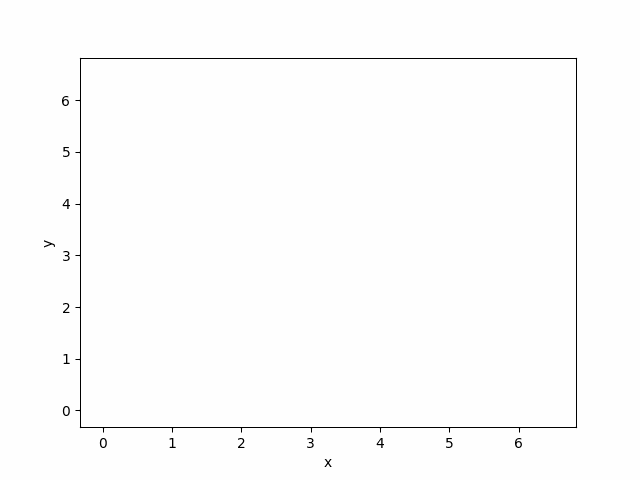

In [79]:
vis.clear()
testing_sections=[((1,5),(6,1)),((0,0),(6.5,3)),((1.3,2.6),(2,3.5)),((3,2.2),(4,2))]
intersections,vis=find_intersections_with_visualization(testing_sections)
vis.show_gif(interval=200)

### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

Owszem, mój program uwzględnia taki przypadek poprzez korzystanie ze zbioru (```set()```), w którym zapisuje pary indeksów odcinków, dla których już było badane sprawdzenie przecięcia. W trakcie przebiegu algorytmu ułożenie odcinków w strukturze stanu (i ich wewnętrzne indeksy w tej strukturze) może wielokrotnie ulegać zmianom, ale ich indeksy w tablicy wejściowej są niezmienne. Dzięki zapamiętywaniu badanych par odcinków, nie badam ani nie dodaję do struktury zdarzeń danego punktu przecięcia wielokrotnie. Sprawdzanie przynależności do zbioru odbywa się w czasie $O$(1), a złożoność pamięciowa zależy od liczby sprawdzanych par odcinków - pesymistycznie $O$(n<sup>2</sup>).